# Question 3: Rolling Windows and Visualization

This question focuses on rolling window operations and time series visualization using disease surveillance data (monthly) and patient vital signs data (daily).

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_style('whitegrid')

# Create output directory
os.makedirs('output', exist_ok=True)

## Part 3.1: Load and Prepare Data

**Note:** 
- **Disease Surveillance**: 6 sites over 5 years (360 records total). This longer time period provides better opportunities to see seasonal patterns and trends.
- **Patient Vitals**: We'll aggregate by date (average across all patients) to create a daily time series for rolling window analysis. This handles missing data naturally.

In [2]:
# Load disease surveillance data (monthly)
disease_surveillance = pd.read_csv('data/disease_surveillance.csv')

# Load patient vitals data (daily) - for rolling window practice
patient_vitals = pd.read_csv('data/patient_vitals.csv')

print("Disease surveillance shape:", disease_surveillance.shape)
print("Patient vitals shape:", patient_vitals.shape)

# Convert datetime columns and set as index
disease_surveillance['date'] = pd.to_datetime(disease_surveillance['date'])
disease_surveillance = disease_surveillance.set_index('date')

patient_vitals['date'] = pd.to_datetime(patient_vitals['date'])
patient_vitals = patient_vitals.set_index('date')

# For rolling windows, work with a single patient's data or aggregate
# Let's aggregate patient vitals by date (average across patients)
# This creates a daily time series and handles missing data naturally
# Note: Sort the index for reliable rolling operations
patient_vitals_daily = patient_vitals.groupby('date').agg({
    'temperature': 'mean',
    'heart_rate': 'mean',
    'weight': 'mean'
})
patient_vitals_daily = patient_vitals_daily.sort_index()  # Sort index for rolling operations

print("\nDisease surveillance sample:")
print(disease_surveillance.head())
print("\nPatient vitals (aggregated daily) sample:")
print(patient_vitals_daily.head())
print(f"\nDaily aggregated records: {len(patient_vitals_daily)} (covers full year)")

Disease surveillance shape: (108, 5)
Patient vitals shape: (18250, 7)

Disease surveillance sample:
              site  cases  temperature  humidity
date                                            
2021-01-31  Site_A    105         58.5      67.4
2021-02-28  Site_A    121         70.6      52.1
2021-03-31  Site_A    133         83.1      42.3
2021-04-30  Site_A    140         97.6      38.7
2021-05-31  Site_A    126         81.1      46.8

Patient vitals (aggregated daily) sample:
            temperature  heart_rate     weight
date                                          
2023-01-01    98.667865       74.80  67.174295
2023-01-02    98.650347       75.52  67.117837
2023-01-03    98.734246       75.20  67.306747
2023-01-04    98.697151       75.04  67.250530
2023-01-05    98.601767       75.04  67.280478

Daily aggregated records: 365 (covers full year)


## Part 3.2: Basic Rolling Operations

**💡 TIP: Rolling Windows Create NaN Values**
Rolling window calculations create NaN (missing) values for the first N-1 observations, where N is the window size. For example, a 7-day rolling mean will have NaN for the first 6 days. This is expected and normal - there isn't enough data to fill the window yet!

**TODO: Apply rolling window operations**

In [3]:
# Use patient_vitals_daily (daily aggregated data)

# 7-day rolling statistics
patient_vitals_daily['temperature_rolling_7d_mean'] = (
    patient_vitals_daily['temperature'].rolling(window=7, min_periods=1).mean()
)
patient_vitals_daily['temperature_rolling_7d_std'] = (
    patient_vitals_daily['temperature'].rolling(window=7, min_periods=1).std()
)

# 30-day rolling statistics
patient_vitals_daily['temperature_rolling_30d_mean'] = (
    patient_vitals_daily['temperature'].rolling(window=30, min_periods=1).mean()
)
patient_vitals_daily['temperature_rolling_30d_min'] = (
    patient_vitals_daily['temperature'].rolling(window=30, min_periods=1).min()
)
patient_vitals_daily['temperature_rolling_30d_max'] = (
    patient_vitals_daily['temperature'].rolling(window=30, min_periods=1).max()
)

# 7-day rolling sum
patient_vitals_daily['temperature_rolling_7d_sum'] = (
    patient_vitals_daily['temperature'].rolling(window=7, min_periods=1).sum()
)

# 14-day rolling mean
patient_vitals_daily['temperature_rolling_14d_mean'] = (
    patient_vitals_daily['temperature'].rolling(window=14, min_periods=1).mean()
)


# Create Rolling Statistics DataFrame

rolling_stats = patient_vitals_daily[['temperature']].copy()
rolling_stats['rolling_7d_mean'] = patient_vitals_daily['temperature_rolling_7d_mean']
rolling_stats['rolling_7d_std'] = patient_vitals_daily['temperature_rolling_7d_std']
rolling_stats['rolling_30d_mean'] = patient_vitals_daily['temperature_rolling_30d_mean']
rolling_stats['rolling_30d_min'] = patient_vitals_daily['temperature_rolling_30d_min']
rolling_stats['rolling_30d_max'] = patient_vitals_daily['temperature_rolling_30d_max']

# Convert index to a column (required for saving / tests)
rolling_stats = rolling_stats.reset_index()

rolling_stats.head()

,date,temperature,rolling_7d_mean,rolling_7d_std,rolling_30d_mean,rolling_30d_min,rolling_30d_max
0,2023-01-01,98.667865,98.667865,NaN,98.667865,98.667865,98.667865
1,2023-01-02,98.650347,98.659106,0.012387,98.659106,98.650347,98.667865
2,2023-01-03,98.734246,98.684152,0.044257,98.684152,98.650347,98.734246
3,2023-01-04,98.697151,98.687402,0.036716,98.687402,98.650347,98.734246
4,2023-01-05,98.601767,98.670275,0.049777,98.670275,98.601767,98.734246


## Part 3.3: Advanced Rolling Operations

**TODO: Apply advanced rolling operations**

In [4]:
# Centered 7-day rolling window
patient_vitals_daily['temperature_rolling_7d_centered'] = (
    patient_vitals_daily['temperature']
    .rolling(window=7, center=True, min_periods=1)
    .mean()
)

# Expanding window mean (from start of series)
patient_vitals_daily['temperature_expanding_mean'] = (
    patient_vitals_daily['temperature']
    .expanding(min_periods=1)
    .mean()
)

# Exponentially Weighted Moving Averages (EWMA)
patient_vitals_daily['temperature_ewm_span_7'] = (
    patient_vitals_daily['temperature']
    .ewm(span=7, adjust=False)
    .mean()
)

patient_vitals_daily['temperature_ewm_span_30'] = (
    patient_vitals_daily['temperature']
    .ewm(span=30, adjust=False)
    .mean()
)

patient_vitals_daily['temperature_ewm_alpha_0.3'] = (
    patient_vitals_daily['temperature']
    .ewm(alpha=0.3, adjust=False)
    .mean()
)

# -------------------------------------
# Custom rolling function: rolling range
# -------------------------------------
def rolling_range(series):
    """Calculate rolling range (max - min)."""
    return series.max() - series.min()

patient_vitals_daily['temperature_rolling_7d_range'] = (
    patient_vitals_daily['temperature']
    .rolling(window=7, min_periods=1)
    .apply(rolling_range, raw=False)
)

# Rolling with min_periods requirement
patient_vitals_daily['temperature_rolling_7d_min_periods'] = (
    patient_vitals_daily['temperature']
    .rolling(window=7, min_periods=3)
    .mean()
)

# -------------------------------------
# Create comprehensive rolling comparison DataFrame
# -------------------------------------
rolling_comparison = pd.DataFrame({
    'date': patient_vitals_daily.index,
    'original_value': patient_vitals_daily['temperature'],
    'rolling_7d_mean': patient_vitals_daily['temperature_rolling_7d_mean'],
    'rolling_7d_std': patient_vitals_daily['temperature_rolling_7d_std'],
    'rolling_30d_mean': patient_vitals_daily['temperature_rolling_30d_mean'],
    'rolling_30d_min': patient_vitals_daily['temperature_rolling_30d_min'],
    'rolling_30d_max': patient_vitals_daily['temperature_rolling_30d_max'],
    'ewm_span_7': patient_vitals_daily['temperature_ewm_span_7'],
    'expanding_mean': patient_vitals_daily['temperature_expanding_mean']
})

# Save


## Part 3.4: Trend Analysis Visualization

**TODO: Create trend analysis visualization**

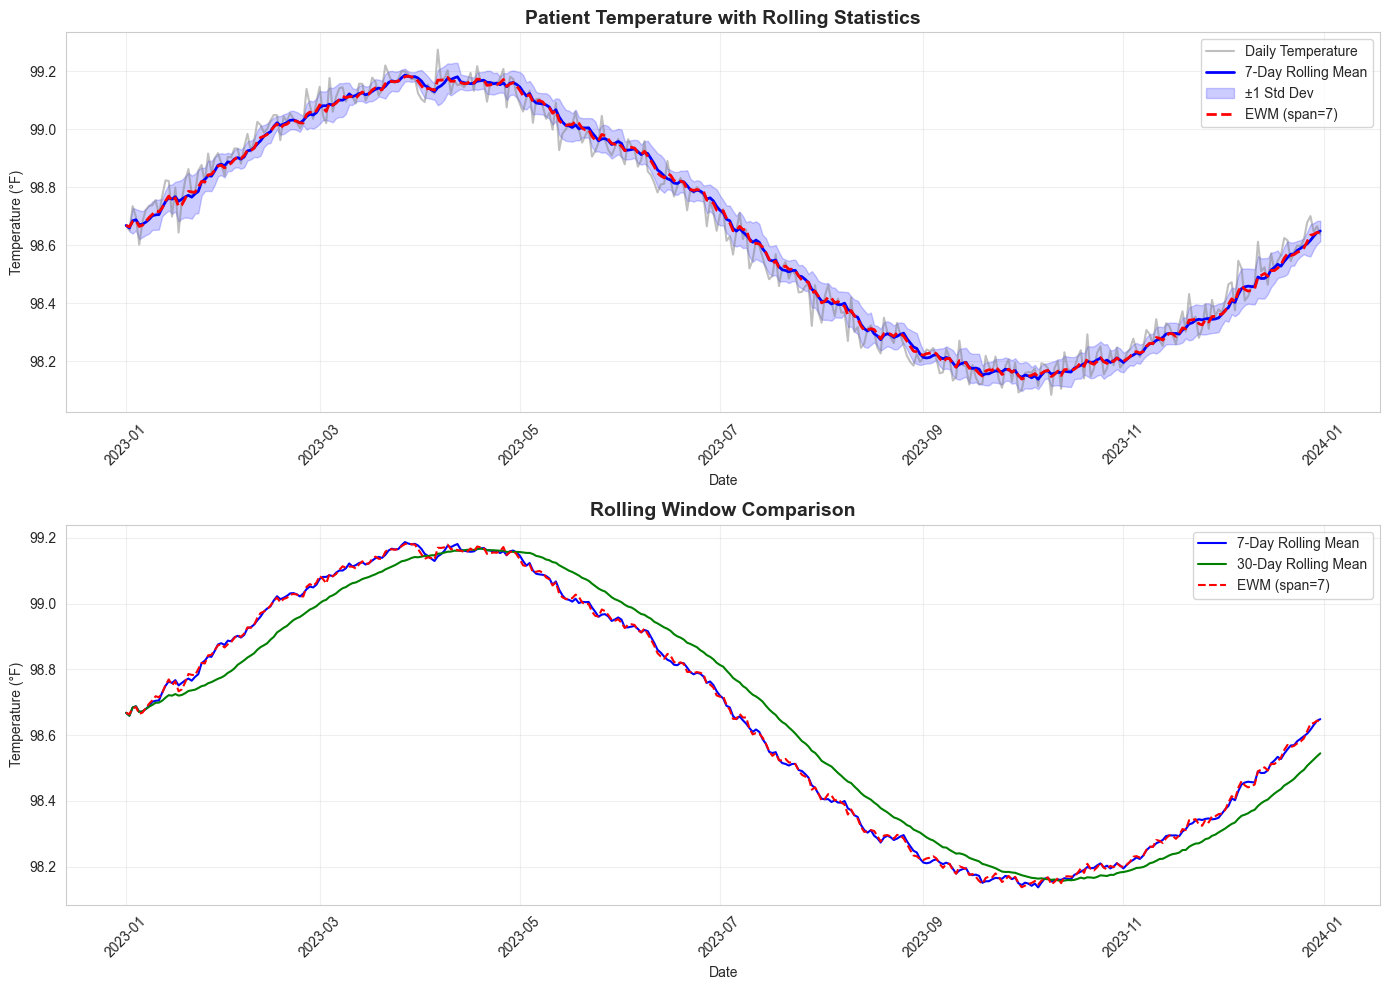

In [5]:
# Use patient_vitals_daily with rolling statistics from Part 3.2
# -------------------------------------
# Q3.4 — Time Series Visualization
# -------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# -------------------------------------
# Top subplot: Original + Rolling + Std Bands + EWM
# -------------------------------------

# Original temperature series
axes[0].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature'],
    alpha=0.5,
    label='Daily Temperature',
    color='gray'
)

# Rolling mean (7-day)
axes[0].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_rolling_7d_mean'],
    linewidth=2,
    label='7-Day Rolling Mean',
    color='blue'
)

# Rolling std bands
upper_bound = (patient_vitals_daily['temperature_rolling_7d_mean'] +
               patient_vitals_daily['temperature_rolling_7d_std'])
lower_bound = (patient_vitals_daily['temperature_rolling_7d_mean'] -
               patient_vitals_daily['temperature_rolling_7d_std'])

axes[0].fill_between(
    patient_vitals_daily.index,
    lower_bound,
    upper_bound,
    alpha=0.2,
    color='blue',
    label='±1 Std Dev'
)

# Exponentially-weighted moving average (span=7)
axes[0].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_ewm_span_7'],
    linewidth=2,
    linestyle='--',
    color='red',
    label='EWM (span=7)'
)

axes[0].set_title('Patient Temperature with Rolling Statistics',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°F)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# -------------------------------------
# Bottom subplot: Rolling Comparison
# -------------------------------------

axes[1].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_rolling_7d_mean'],
    label='7-Day Rolling Mean',
    color='blue'
)

axes[1].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_rolling_30d_mean'],
    label='30-Day Rolling Mean',
    color='green'
)

axes[1].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_ewm_span_7'],
    linestyle='--',
    label='EWM (span=7)',
    color='red'
)

axes[1].set_title('Rolling Window Comparison',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature (°F)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()

# -------------------------------------
# Save Figure
# -------------------------------------
plt.savefig('output/q3_trend_analysis.png', dpi=150, bbox_inches='tight')

plt.show()

## Part 3.5: Comprehensive Visualization

**TODO: Create comprehensive multi-variable time series visualization**

**Note:** In Part 3.2, you created `temperature_rolling_7d_mean` for the `temperature` column. For this visualization, you'll need to create separate rolling means for `heart_rate` and `weight` columns as well. Use consistent naming convention (e.g., `heart_rate_rolling_7d_mean` and `weight_rolling_7d_mean`).

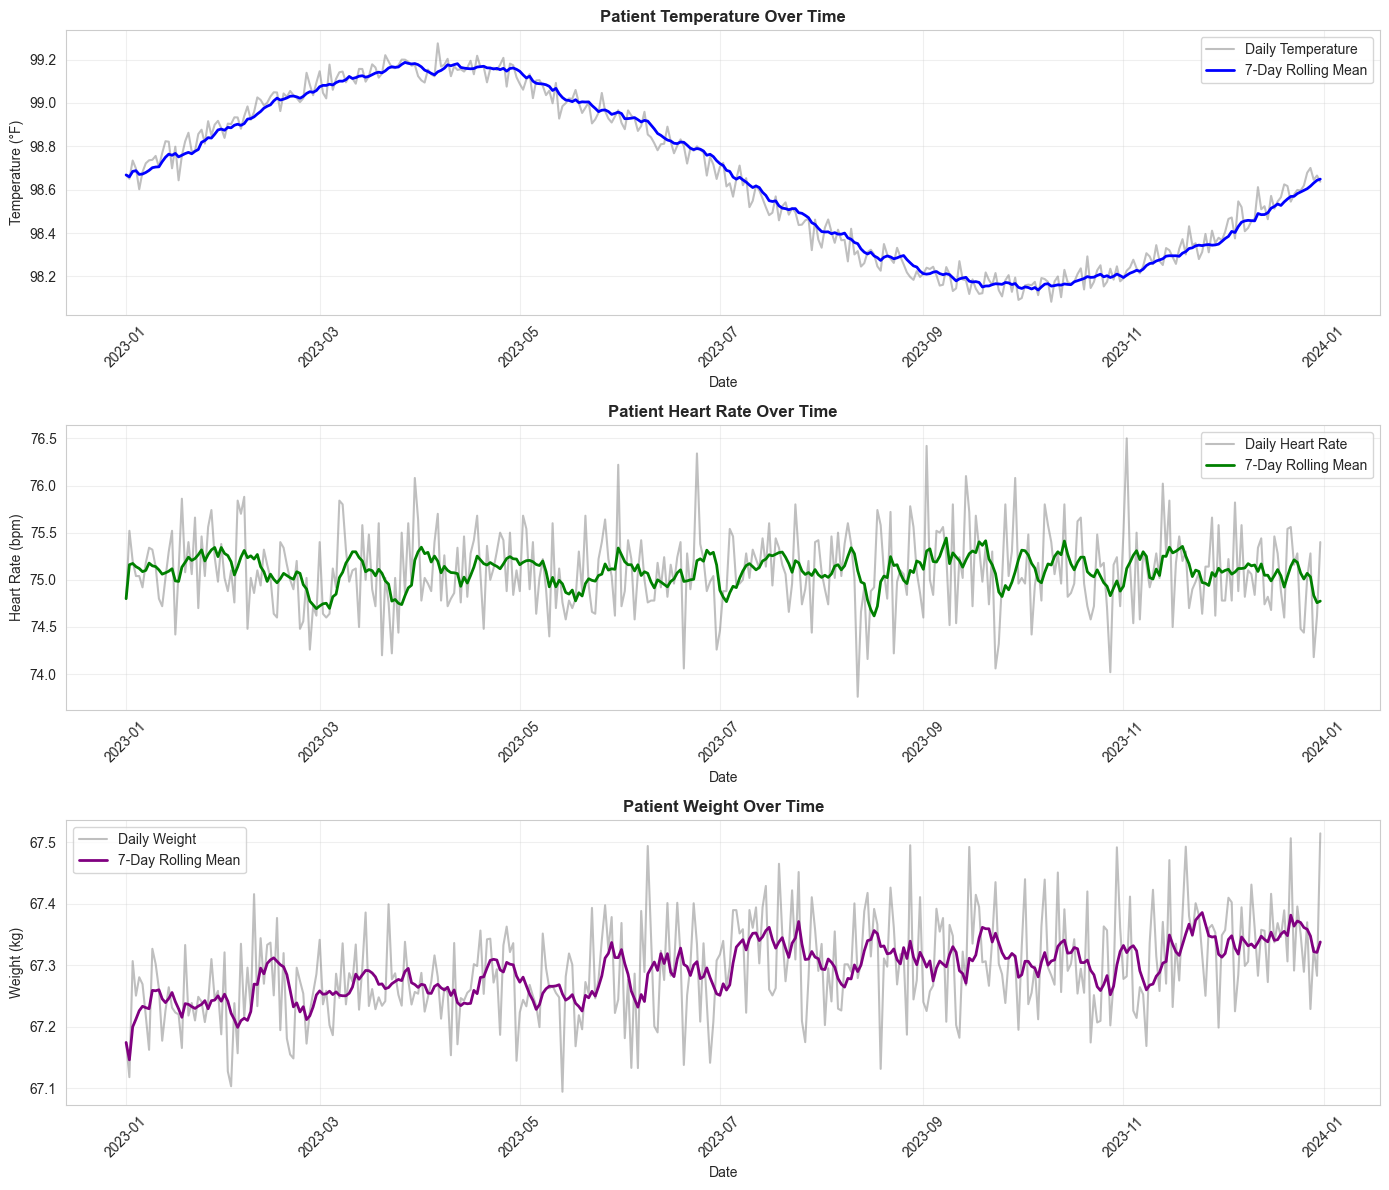

In [6]:
# -------------------------------------
# Q3.5 — Time Series Visualization (3 Variables)
# -------------------------------------

# Create rolling means for heart rate and weight
patient_vitals_daily['heart_rate_rolling_7d_mean'] = (
    patient_vitals_daily['heart_rate'].rolling(window=7, min_periods=1).mean()
)

patient_vitals_daily['weight_rolling_7d_mean'] = (
    patient_vitals_daily['weight'].rolling(window=7, min_periods=1).mean()
)

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# -------------------------------------
# Subplot 1 — Temperature
# -------------------------------------
axes[0].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature'],
    alpha=0.5,
    label='Daily Temperature',
    color='gray'
)
axes[0].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['temperature_rolling_7d_mean'],
    linewidth=2,
    label='7-Day Rolling Mean',
    color='blue'
)

axes[0].set_title('Patient Temperature Over Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°F)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# -------------------------------------
# Subplot 2 — Heart Rate
# -------------------------------------
axes[1].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['heart_rate'],
    alpha=0.5,
    label='Daily Heart Rate',
    color='gray'
)

axes[1].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['heart_rate_rolling_7d_mean'],
    linewidth=2,
    label='7-Day Rolling Mean',
    color='green'
)

axes[1].set_title('Patient Heart Rate Over Time', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Heart Rate (bpm)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# -------------------------------------
# Subplot 3 — Weight
# -------------------------------------
axes[2].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['weight'],
    alpha=0.5,
    label='Daily Weight',
    color='gray'
)

axes[2].plot(
    patient_vitals_daily.index,
    patient_vitals_daily['weight_rolling_7d_mean'],
    linewidth=2,
    label='7-Day Rolling Mean',
    color='purple'
)

axes[2].set_title('Patient Weight Over Time', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Weight (kg)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

# Formatting
plt.tight_layout()

# Save the figure
plt.savefig('output/q3_visualization.png', dpi=150, bbox_inches='tight')

plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q3_rolling_analysis.csv` - rolling window analysis
- [ ] `output/q3_trend_analysis.png` - trend analysis visualization
- [ ] `output/q3_visualization.png` - comprehensive time series plot
